# Численное решение нелинейных уравнений

В лабораторной работе рассматриваются два метода численного решения — метод половинного деления и метод Ньютона — на примере уравнения третьей степени $x^3 + 2.28x^2 - 1.934x - 3.907 = 0$.

Начнем с построения графика функции, что позволит нам определить интервалы изоляции корней:

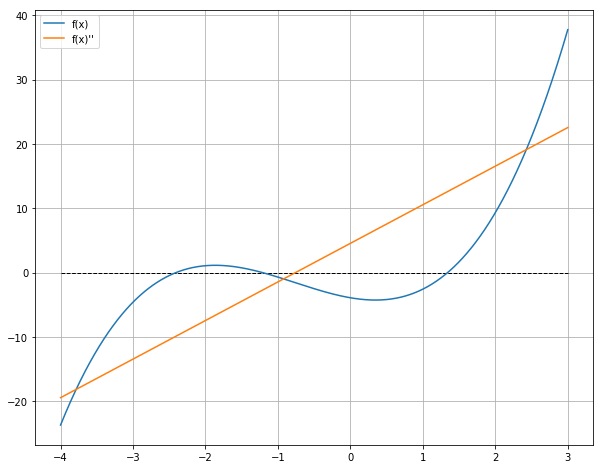

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-4, 3, step=0.001)
y = (x**3) + (2.28 * x**2) + (-1.934 * x) - 3.907
y_prime = (3 * x**2) + (4.56 * x) + (-1.934)
y_prime_prime = (6 * x) + (4.56)

plt.figure(figsize=(10,8))
plt.hlines(y=0, xmin=-4, xmax=3, linewidth=1, linestyles='dashed')
plt.plot(x, y, label="f(x)")
#plt.plot(x, y_prime)
plt.plot(x, y_prime_prime, label="f(x)''")
plt.legend()
plt.grid()
plt.show()

Уточним правый корень (в интервале $[0.5, 2.5]$) методом половинного деления с точностью $10^{-2}$:

In [2]:
import pandas as pd
from _nonlineq import bisect_solve_interval_log

k0, k1, k2, k3 = 1, 2.28, -1.934, -3.907
interval_start, interval_end = 0.5, 2.5
delta = 10**-2

iterations = bisect_solve_interval_log(k0, k1, k2, k3, interval_start, interval_end, delta) 
pd.DataFrame(iterations, columns=["$a$", "$b$", "$x$", "$f(a)$", "$f(b)$", "$f(x)$", "$|a-b|$"]).round(3)

,$a$,$b$,$x$,$f(a)$,$f(b)$,$f(x)$,$|a-b|$
0,0.500,2.500,1.500,-4.179,1.697,1.697,2.000
1,0.500,1.500,1.000,-2.561,1.697,-2.561,1.000
2,1.000,1.500,1.250,-0.809,1.697,-0.809,0.500
3,1.250,1.500,1.375,-0.809,0.344,0.344,0.250
4,1.250,1.375,1.312,-0.257,0.344,-0.257,0.125
5,1.312,1.375,1.344,-0.257,0.037,0.037,0.062
6,1.312,1.344,1.328,-0.111,0.037,-0.111,0.031
7,1.328,1.344,1.336,-0.037,0.037,-0.037,0.016


Уточним левый корень (в интервале $[-4, -2]$) методом Ньютона с точностью $10^{-2}$:

In [3]:
from _nonlineq import newton_solve_interval_log

k0, k1, k2, k3 = 1, 2.28, -1.934, -3.907
interval_start, interval_end = -4, -2
delta = 10**-2

iterations = newton_solve_interval_log(k0, k1, k2, k3, interval_start, interval_end, delta) 
pd.DataFrame(iterations, columns=["$x_k$", "$f(x_k)$", "$f'(x_k)$", "$x_{k+1}$", "$|x_k - x_{k + 1}|$"]).round(3)

,$x_k$,$f(x_k)$,$f'(x_k)$,$x_{k+1}$,$|x_k - x_{k + 1}|$
0,-4.000,-23.691,27.826,-3.149,0.851
1,-3.149,-6.429,13.449,-2.671,0.478
2,-2.671,-1.528,7.285,-2.461,0.210
3,-2.461,-0.243,5.012,-2.412,0.048
4,-2.412,-0.012,4.524,-2.410,0.003


# Пользовательский интерфейс

In [4]:
from interface import run
   
run()

interactive(children=(RadioButtons(description='Режим:', options=('чтение из файла', 'интерактивный ввод'), va…

# Сравнение скорости

In [5]:
from _nonlineq import bisect_solve_interval, newton_solve_interval

#%timeit bisect_solve_interval(1, 2.28, -1.934, -3.907, -4, -1.8, 0.0000001)
#%timeit newton_solve_interval(1, 2.28, -1.934, -3.907, -4, -1.8, 0.0000001)